# Практика

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
import math
%matplotlib inline
import math

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [13]:
# распределение dgamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html#scipy.stats.dgamma
a = 1.1
dgamma_rv = sts.dgamma(a)
# Generate random numbers
dgamma_sample = dgamma_rv.rvs(1000)
# dgamma_sample

In [3]:
dgamma_sample.dtype

dtype('float64')

In [4]:
real_mean = dgamma_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [5]:
real_var = dgamma_rv.var() # настоящая дисперсия случайной величины
real_var

2.3100000000000005

In [6]:
real_std = dgamma_rv.std() # настоящее стандартное отклонение случайной величины
real_std

1.5198684153570665

### Постройте гистограмму выборки и теоретическую плотность распределения

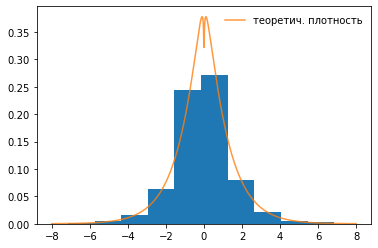

In [14]:
plt.hist(dgamma_sample, density=True)
x = np.linspace(-8,8,1000)
pdf = dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)

In [15]:
dgamma_sample_mean = dgamma_sample.mean() # выборочное среднее
print(dgamma_sample_mean)
dgamma_sample_var = dgamma_sample.var() # выборочная дисперсия
print(dgamma_sample_var)

-0.017162910653113102
2.2852387224631188


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

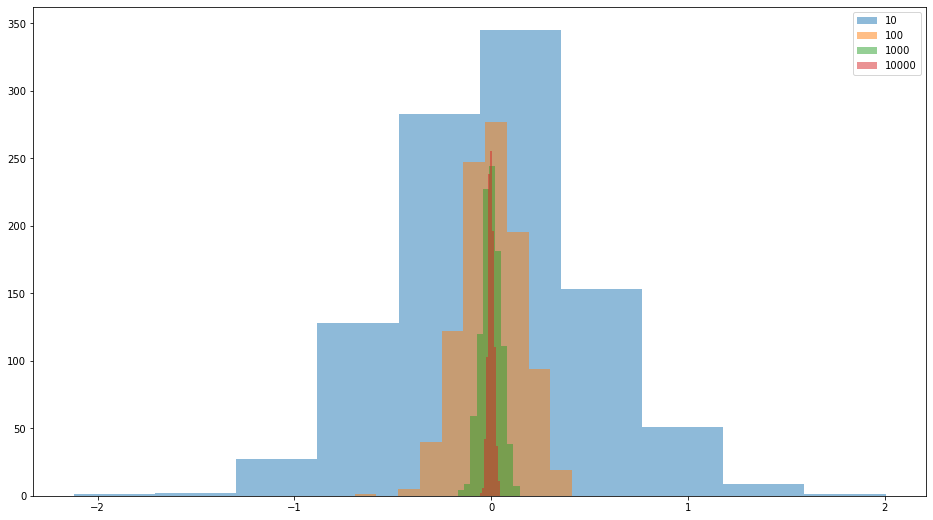

In [16]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(dgamma_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [17]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(dgamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)

[]

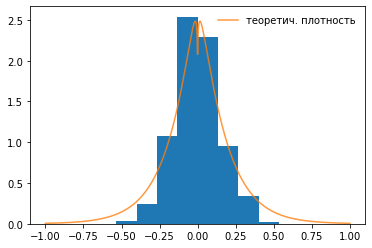

In [18]:
real_dgamma_rv = sts.dgamma(a, loc=dgamma_rv.mean(), scale=dgamma_rv.std() / np.sqrt(N))
n = round(1 + 3.322*math.log10(N))
plt.hist(means, density=True, bins=n)
x = np.linspace(-1,1, 1000)
pdf = real_dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Для dgamma распределения апроксимация распределения выборочного среднего, на мой взгляд, работает хорошо, 
# так как распределение случайной величины Х не является ассимметричным, 
# при этом количество примеров не должно превышать несколько десятков.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [19]:
url = 'https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv'
df = pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [20]:
df[['total day calls', 'churn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total day calls  3333 non-null   int64
 1   churn            3333 non-null   bool 
dtypes: bool(1), int64(1)
memory usage: 29.4 KB


In [21]:
df['total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64

In [31]:
# создаем выборку 'total day calls' по колонке 'churn' со значением False
df_churn_false = df[['total day calls', 'churn']].query('(churn == False)')
len(df_churn_false)

2850

In [43]:
# считаем среднюю, дисперсию и стандартное отклонение для выборки False
mean_false = df_churn_false['total day calls'].mean()
var_false = df_churn_false['total day calls'].var(ddof=1)
std_false = df_churn_false['total day calls'].std(ddof=1)

print("mean_false", mean_false)
print("var_false", var_false)
print("std_false", std_false)

mean_false 100.28315789473685
var_false 392.08581663003537
std_false 19.801156951805503


In [53]:
# считаем доверительный интервал для среднего значения 'total day calls' для выборки False
print("Доверительный интервал для среднего значения total day calls (churn - False): [{}, {}] ".format(
    mean_false - 2 * std_false / np.sqrt(len(df_churn_false)), mean_false + 2 * std_false / np.sqrt(len(df_churn_false)) 
))

Доверительный интервал для среднего значения total day calls (churn - False): [99.54133858857831, 101.02497720089538] 


In [54]:
# создаем выборку 'total day calls' по колонке 'churn' со значением True
df_churn_true = df[['total day calls', 'churn']].query('(churn == True)')
len(df_churn_true)

483

In [55]:
# считаем среднюю, дисперсию и стандартное отклонение для выборки True
mean_true = df_churn_true['total day calls'].mean()
var_true = df_churn_true['total day calls'].var(ddof=1)
std_true = df_churn_true['total day calls'].std(ddof=1)

print("mean_true", mean_true)
print("var_true", var_true)
print("std_true", std_true)

mean_true 101.33540372670808
var_true 465.79598463957115
std_true 21.58230721307551


In [56]:
# считаем доверительный интервал для среднего значения 'total day calls' для выборки True
print("Доверительный интервал для среднего значения total day calls (churn - True): [{}, {}] ".format(
    mean_true - 2 * std_true / np.sqrt(len(df_churn_true)), mean_true + 2 * std_true / np.sqrt(len(df_churn_true)) 
))

Доверительный интервал для среднего значения total day calls (churn - True): [99.37134576363385, 103.2994616897823] 


In [70]:
# считаем доверительный интервал с помощью statsmodels.stats.weightstats для среднего значения 'total day calls' для выборки False
print ("mean_f = {:.8}".format(str(df_churn_false['total day calls'].mean())))
print ("std_f = {:.8}".format(str(df_churn_false['total day calls'].std(ddof=1))))

ssw._zconfint_generic(df_churn_false['total day calls'].mean(),  df_churn_false['total day calls'].std(ddof=1) / np.sqrt(len(df_churn_false)),\
                      alpha=0.95, alternative='two-sided')

mean_f = 100.2831
std_f = 19.80115


(100.25989934548421, 100.30641644398948)

In [72]:
# считаем доверительный интервал с помощью statsmodels.stats.weightstats для среднего значения 'total day calls' для выборки True
print ("mean_t = {:.8}".format(str(df_churn_true['total day calls'].mean())))
print ("std_t = {:.8}".format(str(df_churn_true['total day calls'].std(ddof=1))))

ssw._zconfint_generic(df_churn_true['total day calls'].mean(),  df_churn_true['total day calls'].std(ddof=1) / np.sqrt(len(df_churn_true)),\
                      alpha=0.95, alternative='two-sided')

mean_t = 101.3354
std_t = 21.58230


(101.27382385342904, 101.39698359998712)